<a href="https://colab.research.google.com/github/IraAndreykiv/ML/blob/main/Lab3_ML(Andreykiv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving employees.csv to employees.csv
Saving nba.csv to nba.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_employee = pd.read_csv ("employees.csv")
df_employee.info

<bound method DataFrame.info of     First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
1       Thomas    Male   3/31/1996         6:53 AM   61933    4.170   
2        Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
..         ...     ...         ...             ...     ...      ...   
995      Henry     NaN  11/23/2014         6:09 AM  132483   16.655   
996    Phillip    Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
1                True  

In [ ]:
df_nba = pd.read_csv("nba.csv")
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [ ]:
print(df_employee.isna().sum())
df_employee.dropna(axis=0, inplace=True)
print(df_employee.isna().sum())

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64
First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


In [ ]:
print(df_nba.isna().sum())
df_nba.dropna(axis=0, inplace=True)
print(df_nba.isna().sum())

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64
Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [ ]:
print(df_nba.head())
df_nba['Weight'] = round(df_nba['Weight'] * 0.45359237, 2)

import re
df_nba["ft"] = 0
df_nba['in'] = 0
for i in range(len(df_nba['Height'])):
  m_ft = re.search(r"[1-9]*-", df_nba['Height'].iloc[i])
  df_nba['ft'].iloc[i] = int(m_ft.group()[:-1])
  m_in = re.search(r"-[1-9]*", df_nba['Height'].iloc[i])
  if m_in.group()[1:].isdigit():
    df_nba['in'].iloc[i] = int(m_in.group()[1:])
  else:
    df_nba['in'].iloc[i] = 0

df_nba['Height'] = round((df_nba['ft'] * 0.3048) + (df_nba['in'] * 0.0254), 2) 
del df_nba['ft'], df_nba['in']
print(df_nba.head())

            Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
6  Jordan Mickey  Boston Celtics    55.0       PF  21.0    6-8   235.0   
7   Kelly Olynyk  Boston Celtics    41.0        C  25.0    7-0   238.0   

         College     Salary  
0          Texas  7730337.0  
1      Marquette  6796117.0  
3  Georgia State  1148640.0  
6            LSU  1170960.0  
7        Gonzaga  2165160.0  


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


            Name            Team  Number Position   Age  Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    1.88   81.65   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    1.98  106.59   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    1.96   83.91   
6  Jordan Mickey  Boston Celtics    55.0       PF  21.0    2.03  106.59   
7   Kelly Olynyk  Boston Celtics    41.0        C  25.0    2.13  107.95   

         College     Salary  
0          Texas  7730337.0  
1      Marquette  6796117.0  
3  Georgia State  1148640.0  
6            LSU  1170960.0  
7        Gonzaga  2165160.0  


Gender  Team                
Female  Business Development    92645.020408
        Client Services         85742.723404
        Distribution            79812.161290
        Engineering             89708.139535
        Finance                 93483.333333
        Human Resources         89835.878788
        Legal                   91749.242424
        Marketing               97116.555556
        Product                 86333.704545
        Sales                   90055.628571
Male    Business Development    87851.000000
        Client Services         93781.789474
        Distribution            92302.379310
        Engineering             99937.027778
        Finance                 95663.842105
        Human Resources         92149.976744
        Legal                   84491.882353
        Marketing               84745.947368
        Product                 87615.435897
        Sales                   93303.783784
Name: Salary, dtype: float64
Team
Business Development    36844
Client 

Team                  Senior Management
Business Development  False                119082
                      True                 139852
Client Services       False                132940
                      True                 101004
Distribution          False                 95327
                      True                  99283
Engineering           False                 83677
                      True                  95570
Finance               False                130590
                      True                 138705
Human Resources       False                 90370
                      True                 112807
Legal                 False                115163
                      True                 102508
Marketing             False                100612
                      True                  97308
Product               False                 59414
                      True                  65476
Sales                 False                109831
          

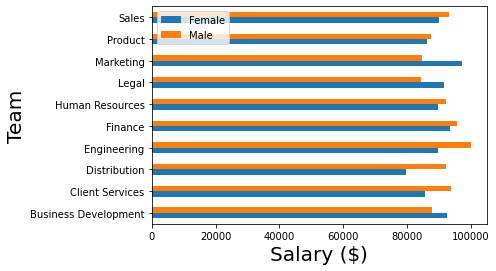

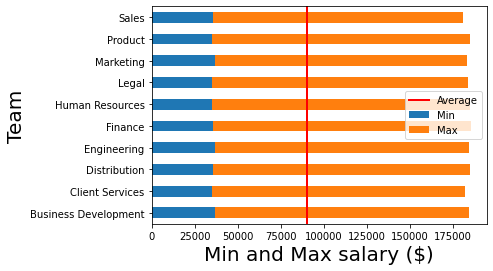

In [ ]:
print(df_employee.groupby(['Gender', 'Team'])['Salary'].mean())
df_employee.groupby(['Gender', 'Team'])['Salary'].mean().unstack(level=0).plot(kind='barh')
plt.xlabel("Salary ($)", fontsize=20)
plt.ylabel("Team", fontsize=20)
plt.legend(loc = 2)

print(df_employee.groupby(['Team'])['Salary'].min())
print(df_employee.groupby(['Team'])['Salary'].max())

df_employee.groupby(['Team']).agg({'Salary': [np.min,np.max]}).\
plot.barh(stacked=True)
plt.axvline(df_employee['Salary'].mean(), color='red', linewidth=2)
plt.xlabel("Min and Max salary ($)", fontsize=20)
plt.ylabel("Team", fontsize=20)
plt.legend(['Average','Min', 'Max'])
df_employee.groupby(['Team', 'Senior Management'])['Salary'].agg(lambda x:x.value_counts().index[0])

In [ ]:
print(df_nba.groupby(['Position'])["Age" ,"Height", 'Weight'].mean())
print(df_nba.groupby(['Position'])['Salary'].max())
print(df_nba.groupby(['Position'])['Salary'].min())
print(df_nba.groupby(['Position'])['Salary'].median())

                Age    Height      Weight
Position                                 
C         26.857143  2.071020  114.739388
PF        26.679012  2.011975  108.615556
PG        26.750000  1.888421   86.308026
SF        26.732394  2.010141  100.582254
SG        26.206897  1.969540   93.877356
Position
C     19689000.0
PF    22192730.0
PG    21468695.0
SF    22875000.0
SG    20000000.0
Name: Salary, dtype: float64
Position
C      83397.0
PF    111444.0
PG     55722.0
SF    200600.0
SG     55722.0
Name: Salary, dtype: float64
Position
C     3398280.0
PF    2850000.0
PG    2927470.0
SF    2000000.0
SG    1500000.0
Name: Salary, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(0.0, 25000000.0)

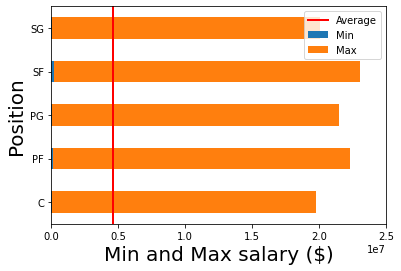

In [ ]:
df_nba.groupby(['Position']).agg({'Salary': [np.min,np.max]}).\
plot.barh(stacked=True)
plt.axvline(df_nba['Salary'].mean(), color='red', linewidth=2)
# plt.axvline(df_nba['Salary'].median(), color='black', linewidth=2)

plt.xlabel("Min and Max salary ($)", fontsize=20)
plt.ylabel("Position", fontsize=20)
plt.legend(['Average','Min', 'Max'])
plt.xlim([0, 25000000])

Text(0, 0.5, 'Team')

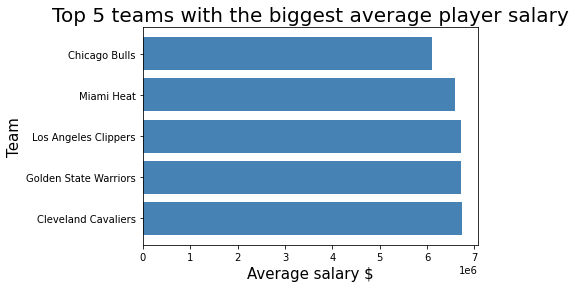

In [ ]:
mean_salary_team = df_nba.groupby(['Team'], as_index=False)['Salary'].mean()
mean_salary_team.sort_values(by = ['Salary'], ascending=False, inplace = True)
top5_mean_salary_team = mean_salary_team.head()
plt.barh(top5_mean_salary_team['Team'], top5_mean_salary_team['Salary'],\
         color = 'steelblue')
plt.title('Top 5 teams with the biggest average player salary', size = 20)
plt.xlabel("Average salary $", fontsize=15)
plt.ylabel("Team", fontsize=15)

In [ ]:
df_employee.to_csv('employee_update.csv')
files.download('employee_update.csv')
df_nba.to_csv('nba_update.csv')
files.download('nba_update.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1  = pd.DataFrame({
    "city": ["Lutsk", "Lviv", "Odessa", "Kyiv"],
    "temperature": [25, 14, 30, 24],
})
print(df1)
df2 = pd.DataFrame({
    "city": ["Lutsk", "Lviv", "Donetsk"],
    "humidity": [65, 68, 69],
})
print(df2)
df3 = pd.merge(df1, df2)
print(df3)
df4 = pd.merge(df1, df2, how = 'left')
print(df4)
df5 = pd.merge(df1, df2, how = 'right')
print(df5)
df6 = pd.merge(df1, df2, how = 'outer')
print(df6)

     city  temperature
0   Lutsk           25
1    Lviv           14
2  Odessa           30
3    Kyiv           24
      city  humidity
0    Lutsk        65
1     Lviv        68
2  Donetsk        69
    city  temperature  humidity
0  Lutsk           25        65
1   Lviv           14        68
     city  temperature  humidity
0   Lutsk           25      65.0
1    Lviv           14      68.0
2  Odessa           30       NaN
3    Kyiv           24       NaN
      city  temperature  humidity
0    Lutsk         25.0        65
1     Lviv         14.0        68
2  Donetsk          NaN        69
      city  temperature  humidity
0    Lutsk         25.0      65.0
1     Lviv         14.0      68.0
2   Odessa         30.0       NaN
3     Kyiv         24.0       NaN
4  Donetsk          NaN      69.0
